In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [78]:
portfolio = pd.read_json('dataset/portfolio.json', orient='records', lines=True)
profile = pd.read_json('dataset/profile.json', orient='records', lines=True)
transcript = pd.read_json('dataset/transcript.json', orient='records', lines=True)

# Exploratory Data Analysisand Data Cleaning

## Portfolio dataset

In [3]:
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)

In [4]:
portfolio

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   offer_id    10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


Text(0, 0.5, 'Count')

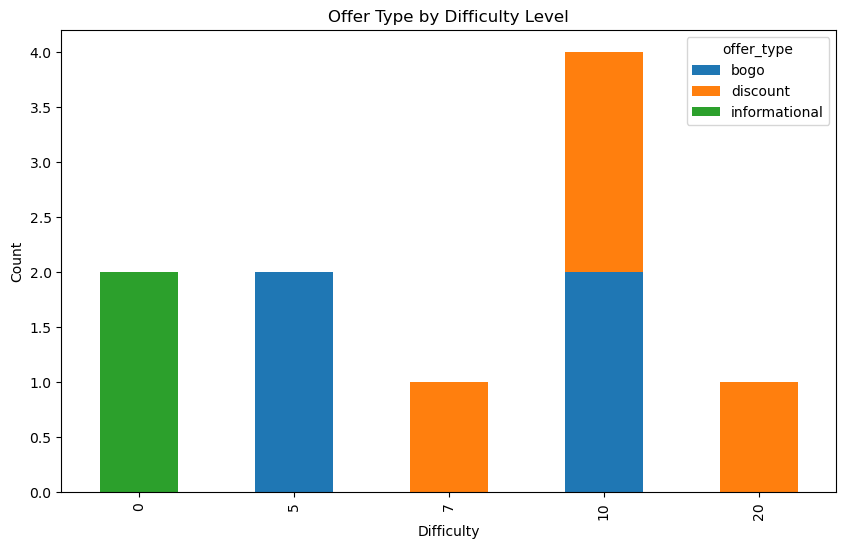

In [6]:
grouped = portfolio.groupby(['difficulty', 'offer_type']).size().unstack()

# Create a bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10,6))

# Set the chart title and axis labels
ax.set_title('Offer Type by Difficulty Level')
ax.set_xlabel('Difficulty')
ax.set_ylabel('Count')

In [7]:
portfolio.groupby('difficulty').agg({
    'reward': ['min', 'max', 'mean', 'count'],
    'duration': ['min', 'max', 'mean'],
    'offer_type': lambda x: x.mode().iloc[0]
})

reward                duration                offer_type
              min max mean count      min max   mean       <lambda>
difficulty                                                         
0               0   0  0.0     2        3   4   3.50  informational
5               5   5  5.0     2        5   7   6.00           bogo
7               3   3  3.0     1        7   7   7.00       discount
10              2  10  6.0     4        5  10   7.25           bogo
20              5   5  5.0     1       10  10  10.00       discount

**overviews**:
- there're no null values
- channels are written in a list format
- there're 4 promotional channels
- there're 10 unique offers with 2 informational, 6 bogo, and 2 discount
- difficulty 0 offers are all informational and do not have any reward
- difficulty 5 offers are all bogo and have reward amounts of 5, with durations ranging from 5 to 7 days
- difficulty 7 offers are all discount and have reward amounts of 5, with the duration of 7 days
- difficulty 10 offers are all bogo and have reward amounts ranging from 2 to 10, with durations ranging from 5 to 10 days
- difficulty 20 offers are all discount with a reward amount of 5 and a duration of 10 days- there're no null values

**to-do:**
- extract channels
- one hote encode channels
- change duration from day to hour
- create reward/hours column
- one hot encode offer_type

In [8]:
portfolio_mod = portfolio.copy()

In [9]:
channels = portfolio_mod['channels'].str.join(sep='*').str.get_dummies(sep='*')
offer_types = pd.get_dummies(portfolio_mod['offer_type'])
portfolio_mod['duration'] = portfolio_mod['duration'] * 24
portfolio_mod['reward_per_hour'] = portfolio_mod['reward'] / portfolio_mod['duration']

In [10]:
portfolio_mod = pd.concat([portfolio_mod, channels, offer_types], axis=1)

In [11]:
portfolio_mod.columns

Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type',
       'offer_id', 'reward_per_hour', 'email', 'mobile', 'social', 'web',
       'bogo', 'discount', 'informational'],
      dtype='object')

In [12]:
portfolio_mod.drop(['channels', 'offer_type'], axis=1, inplace=True)

In [13]:
portfolio_mod = portfolio_mod[['offer_id','difficulty', 'duration', 'reward_per_hour', 'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational']]
portfolio_mod

,offer_id,difficulty,duration,reward_per_hour,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,168,0.059524,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,120,0.083333,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,96,0.000000,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,168,0.029762,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,240,0.020833,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,0.017857,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,240,0.008333,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,72,0.000000,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,120,0.041667,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,168,0.011905,1,1,0,1,0,1,0


## Profile dataset

In [79]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [80]:
profile.rename(columns={'id': 'person_id'}, inplace=True)

In [81]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   person_id         17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [28]:
profile.isna().sum()

gender              2175
age                    0
person_id              0
became_member_on       0
income              2175
dtype: int64

In [110]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6a8561b250>,
 [Text(-0.24762902922809168, 1.0717648360921126, 'M'),
  Text(0.19924591390285712, -1.0818045413997002, 'F'),
  Text(1.098890122095961, -0.049401412529646305, 'O')],
 [Text(-0.1350703795789591, 0.5845990015047886, '57.2%'),
  Text(0.10867958940155842, -0.5900752043998364, '41.3%'),
  Text(0.5993946120523422, -0.026946225016170708, '1.4%')])

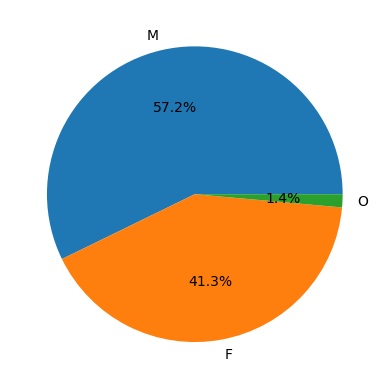

In [32]:
gender_count = profile['gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')

Text(0.5, 1.0, 'Age distribution')

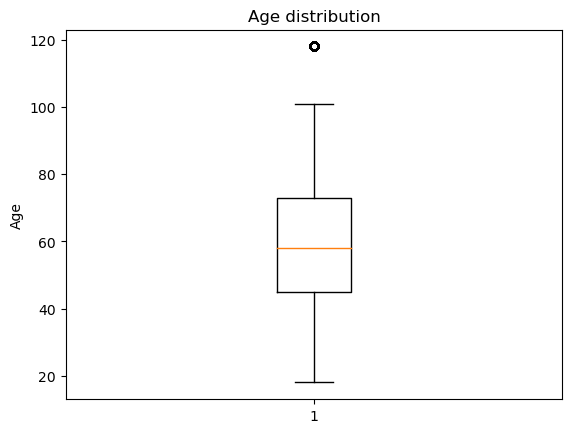

In [35]:
plt.boxplot(profile['age'])
plt.ylabel('Age')
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution')

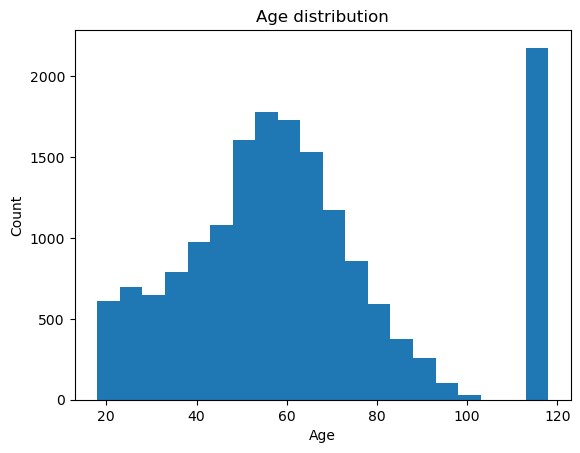

In [34]:
plt.hist(profile['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

<AxesSubplot: xlabel='gender', ylabel='age'>

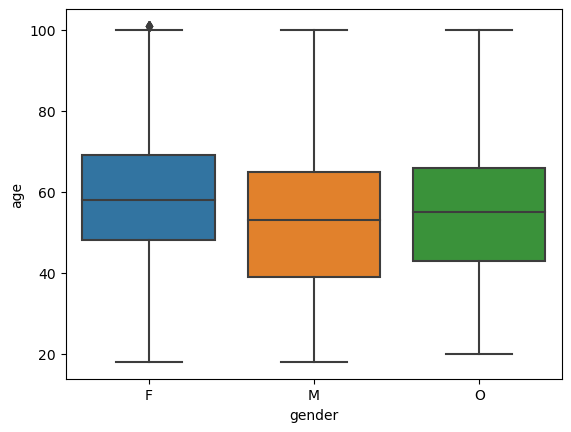

In [75]:
sns.boxplot(x='gender', y='age', data=profile)

In [74]:
mask = profile.isnull().any(axis=1)
null_rows = profile[mask]
null_rows.describe()

,age,became_member_on,income
count,2175.0,2.175000e+03,0.0
mean,118.0,2.016804e+07,NaN
std,0.0,1.009105e+04,NaN
min,118.0,2.013080e+07,NaN
25%,118.0,2.016070e+07,NaN
50%,118.0,2.017073e+07,NaN
75%,118.0,2.017123e+07,NaN
max,118.0,2.018073e+07,NaN


In [77]:
null_rows.gender.unique()

array([None], dtype=object)

In [68]:
profile.duplicated().sum()

0

In [48]:
profile.gender.unique()

array([None, 'F', 'M', 'O'], dtype=object)

<AxesSubplot: xlabel='age', ylabel='Count'>

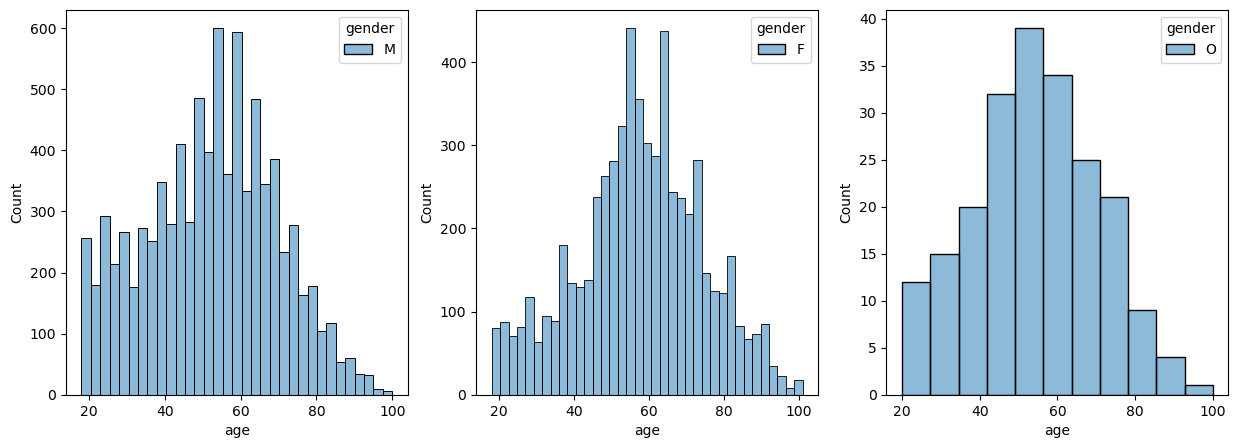

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=profile[profile['gender'] == 'M'], x='age', hue='gender', kde=False, ax=axes[0])
sns.histplot(data=profile[profile['gender'] == 'F'], x='age', hue='gender', kde=False, ax=axes[1])
sns.histplot(data=profile[profile['gender'] == 'O'], x='age', hue='gender', kde=False, ax=axes[2])

<AxesSubplot: xlabel='income', ylabel='Count'>

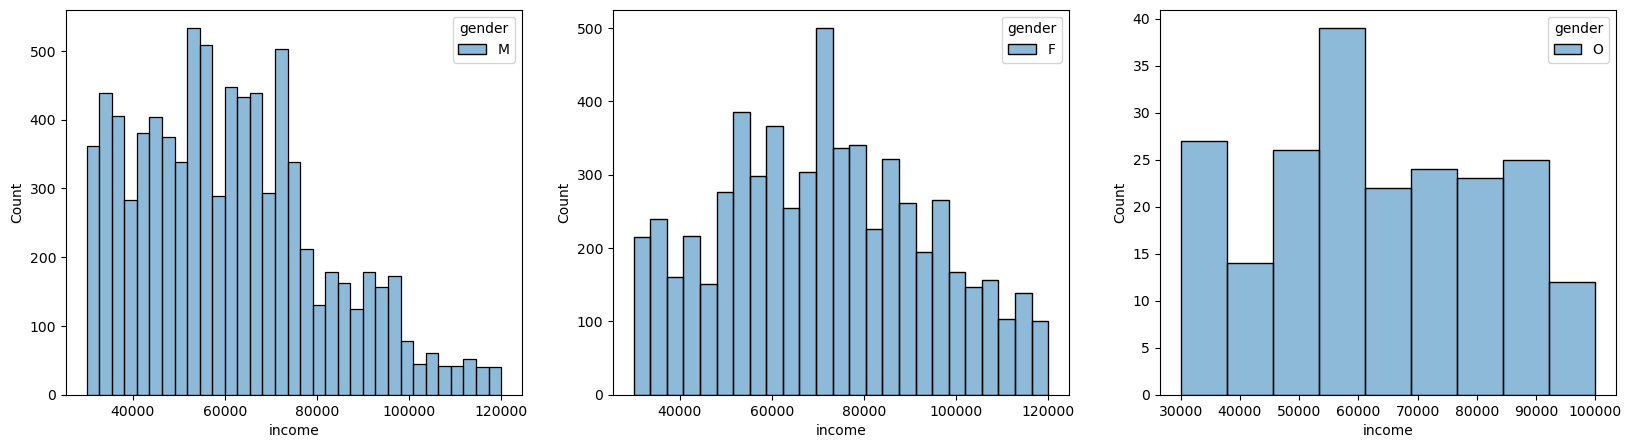

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data=profile[profile['gender'] == 'M'], x='income', hue='gender', kde=False, ax=axes[0])
sns.histplot(data=profile[profile['gender'] == 'F'], x='income', hue='gender', kde=False, ax=axes[1])
sns.histplot(data=profile[profile['gender'] == 'O'], x='income', hue='gender', kde=False, ax=axes[2])

overviews

In [ ]:
to-do

## Transcrpit Dataset

In [16]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [17]:
transcript.rename(columns={'person': 'person_id'}, inplace=True)
transcript['offer_id'] = transcript['value'].apply(lambda x: x.get('offer id'))
transcript.drop(columns=['value'], inplace=True)

In [18]:
transcript['offer_id'].count()

134002

In [19]:
tr_port = transcript.merge(portfolio, on='offer_id')

In [20]:
tr_port['offer_id'].count()

134002

In [21]:
tr_port.head()

,person_id,event,time,offer_id,reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
2,f082d80f0aac47a99173ba8ef8fc1909,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
3,c0d210398dee4a0895b24444a5fcd1d2,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
4,57dd18ec5ddc46828afb81ec5977bef2,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo


In [22]:
prof_tr_port = profile.merge(tr_port, on='person_id')

In [23]:
prof_tr_port.head()

,gender,age,person_id,became_member_on,income,event,time,offer_id,reward,channels,difficulty,duration,offer_type
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,336,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
1,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,348,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
2,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,168,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount
3,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,216,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount
4,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,408,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount


In [24]:
prof_tr_port['offer_id'].count()

134002

In [25]:
prof_tr_port.isna().sum()

gender              17641
age                     0
person_id               0
became_member_on        0
income              17641
event                   0
time                    0
offer_id                0
reward                  0
channels                0
difficulty              0
duration                0
offer_type              0
dtype: int64

encode to datetime and change `become member` to days